In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기

df0 = pd.read_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/rawdata.csv')
df0.head()

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3


In [ ]:
# raw data 보존하기
df = df0.copy()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   날짜       276336 non-null  object 
 1   현재수위     275593 non-null  float64
 2   유입량      275593 non-null  float64
 3   저수량      275593 non-null  float64
 4   공용량      275593 non-null  float64
 5   방류량      275593 non-null  float64
 6   강화대교_조위  271409 non-null  float64
 7   청담대교_유량  259956 non-null  float64
 8   잠수교_유량   79487 non-null   float64
 9   한강대교_유량  275057 non-null  float64
 10  행주대교_유량  276277 non-null  float64
 11  대곡교_강수량  276336 non-null  float64
 12  진관교_강수량  276336 non-null  float64
 13  송정동_강수량  276336 non-null  float64
 14  청담대교_수위  276277 non-null  float64
 15  잠수교_수위   276277 non-null  float64
 16  한강대교_수위  276277 non-null  float64
 17  행주대교_수위  276277 non-null  float64
dtypes: float64(17), object(1)
memory usage: 37.9+ MB


In [ ]:
# 날짜를 index로 바꾸고 dtype을 datetime으로 바꾸기
df.set_index(keys = ['날짜'], inplace = True)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d %H:%M')

In [ ]:
df.head()

,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
날짜,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3


In [ ]:
# 유량, 수위 데이터셋 분리하기

df_intp = df[['잠수교_수위', '잠수교_유량', '청담대교_수위', '청담대교_유량', '한강대교_수위', '한강대교_유량', '행주대교_수위', '행주대교_유량']]

In [ ]:
df_intp.head()

,잠수교_수위,잠수교_유량,청담대교_수위,청담대교_유량,한강대교_수위,한강대교_유량,행주대교_수위,행주대교_유량
날짜,,,,,,,,
2012-05-01 00:00:00,300.2,0.0,310.7,469.05,290.0,729.80,275.3,540.18
2012-05-01 00:10:00,300.2,0.0,314.7,498.00,290.0,731.48,275.3,540.18
2012-05-01 00:20:00,301.2,0.0,313.7,490.68,290.0,726.42,275.3,540.18
2012-05-01 00:30:00,301.2,0.0,311.7,476.21,290.0,726.42,276.3,552.17
2012-05-01 00:40:00,301.2,0.0,311.7,476.21,291.0,707.17,277.3,564.29


In [ ]:
df_intp.isnull().sum()

잠수교_수위         59
잠수교_유량     196849
청담대교_수위        59
청담대교_유량     16380
한강대교_수위        59
한강대교_유량      1279
행주대교_수위        59
행주대교_유량        59
dtype: int64

In [ ]:
# 8개의 컬럼 중 결측치가 상대적으로 적은 6개의 column은 보간

df_intp['잠수교_수위'] = df_intp['잠수교_수위'].interpolate()
df_intp['청담대교_수위'] = df_intp['청담대교_수위'].interpolate()
df_intp['한강대교_수위'] = df_intp['한강대교_수위'].interpolate()
df_intp['행주대교_수위'] = df_intp['행주대교_수위'].interpolate()
df_intp['한강대교_유량'] = df_intp['한강대교_유량'].interpolate()
df_intp['행주대교_유량'] = df_intp['행주대교_유량'].interpolate()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_intp.isnull().sum()

잠수교_수위          0
잠수교_유량     196849
청담대교_수위         0
청담대교_유량     16380
한강대교_수위         0
한강대교_유량         0
행주대교_수위         0
행주대교_유량         0
dtype: int64

### 청담대교 유량

[참고 자료](https://seong6496.tistory.com/195)

[수위-유량 곡선 논문](https://koreascience.kr/article/JAKO201809454741042.pdf)



### 청담대교 수위 - 유량 예측 곡선

In [ ]:
# 수위가 0인 날짜 찾기

df_intp['청담대교_수위'].loc[df_intp['청담대교_수위']==0]

날짜
2022-06-01 00:00:00    0.0
2022-06-01 00:10:00    0.0
2022-06-01 00:20:00    0.0
2022-06-01 00:30:00    0.0
2022-06-01 00:40:00    0.0
                      ... 
2022-07-18 23:10:00    0.0
2022-07-18 23:20:00    0.0
2022-07-18 23:30:00    0.0
2022-07-18 23:40:00    0.0
2022-07-18 23:50:00    0.0
Name: 청담대교_수위, Length: 6912, dtype: float64

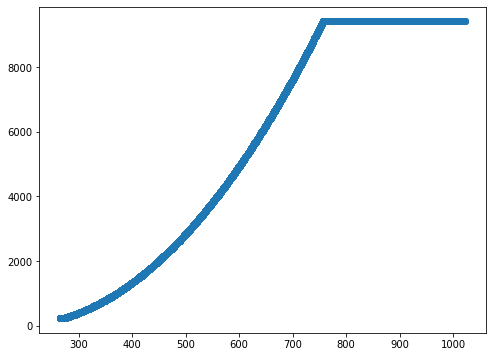

In [ ]:
# 0인 날 제외한 후 그래프 그리기

x = df_intp['청담대교_수위'][:'2022-05-31 23:50:00']
y = df_intp['청담대교_유량'][:'2022-05-31 23:50:00']

plt.figure(figsize = (8, 6))
plt.scatter(x, y)
plt.show()

In [ ]:
# 수위가 750이 넘는 데이터는 제외하기

df_tmp = df_intp[df_intp['청담대교_수위'] < 750][:'2022-05-31 23:50:00']

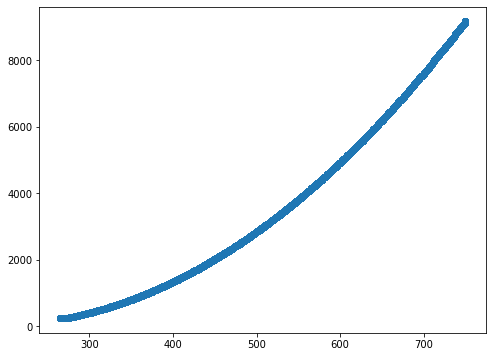

In [ ]:
x1 = df_tmp['청담대교_수위']
y1 = df_tmp['청담대교_유량']

plt.figure(figsize = (8, 6))
plt.scatter(x1, y1)
plt.show()

In [ ]:
x1.shape

(267668,)

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b):
  return a*(x**2.5) + b

In [ ]:
# 유량에 결측치가 있으면 안되므로 결측치가 있는 행 삭제
df_tmp.dropna(inplace = True)

In [ ]:
x2 = df_tmp['청담대교_수위']
y2 = df_tmp['청담대교_유량']

In [ ]:
popt, pcov = curve_fit(func, x2, y2, method = 'lm')

In [ ]:
print(popt, pcov)

[ 6.15233173e-04 -5.77963854e+02] [[ 1.01186720e-14 -2.18163524e-08]
 [-2.18163524e-08  6.77460066e-02]]


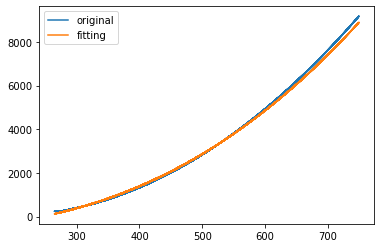

In [ ]:
# plt.rcParams['figure.figsize']=(10,10)
# plt.rcParams['font.family']='/content/drive/MyDrive/연세/YBIGTA/신입기수 프로젝트/AppleGothic.ttf'

plt.plot(x2, y2, label = 'original')
plt.plot(x2, func(x2, *popt), label = 'fitting')
plt.legend()
# plt.xlabel("청담대교_수위")
# plt.ylabel("청담대교_유량")

### 결측치 처리

In [ ]:
# 청담대교 유량이 결측치인 인덱스 가져오기
nanIndex = df_intp[(df_intp['청담대교_유량'].isnull())|(df_intp['청담대교_수위'] > 750)][:'2022-05-31 23:50:00'].index

In [ ]:
nanIndex

DatetimeIndex(['2012-08-21 05:10:00', '2012-08-21 05:20:00',
               '2012-08-21 05:30:00', '2012-08-21 05:40:00',
               '2012-08-21 05:50:00', '2012-08-21 06:00:00',
               '2012-08-21 06:10:00', '2012-08-21 06:20:00',
               '2012-08-21 06:30:00', '2012-08-21 06:40:00',
               ...
               '2022-05-31 06:50:00', '2022-05-31 07:00:00',
               '2022-05-31 07:10:00', '2022-05-31 07:20:00',
               '2022-05-31 07:30:00', '2022-05-31 07:40:00',
               '2022-05-31 07:50:00', '2022-05-31 08:00:00',
               '2022-05-31 08:10:00', '2022-05-31 21:00:00'],
              dtype='datetime64[ns]', name='날짜', length=15577, freq=None)

In [ ]:
len(df_intp)

276336

In [ ]:
df_intp.loc[nanIndex, '청담대교_유량']

날짜
2012-08-21 05:10:00    9339.17
2012-08-21 05:20:00    9339.17
2012-08-21 05:30:00    9405.64
2012-08-21 05:40:00    9405.64
2012-08-21 05:50:00    9339.17
                        ...   
2022-05-31 07:40:00        NaN
2022-05-31 07:50:00        NaN
2022-05-31 08:00:00        NaN
2022-05-31 08:10:00        NaN
2022-05-31 21:00:00        NaN
Name: 청담대교_유량, Length: 15577, dtype: float64

In [ ]:
func(df_intp.loc[nanIndex[0], '청담대교_수위'], popt[0], popt[1])

9048.695836868168

In [ ]:
for i in range(len(nanIndex)):
  df_intp.loc[nanIndex[i], '청담대교_유량'] = func(df_intp.loc[nanIndex[i], '청담대교_수위'], popt[0], popt[1])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
df_intp.isnull().sum()

잠수교_수위          0
잠수교_유량     196849
청담대교_수위         0
청담대교_유량      1216
한강대교_수위         0
한강대교_유량         0
행주대교_수위         0
행주대교_유량         0
dtype: int64

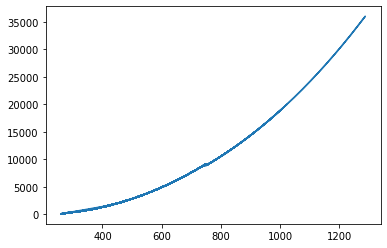

In [ ]:
x3 = df_intp['청담대교_수위'][:'2022-05-31 23:50:00']
y3 = df_intp['청담대교_유량'][:'2022-05-31 23:50:00']

plt.plot(x3, y3)

In [ ]:
x_h = df_intp['행주대교_수위'][:'2022-05-31 23:50:00']
y_h = df_intp['행주대교_유량'][:'2022-05-31 23:50:00']

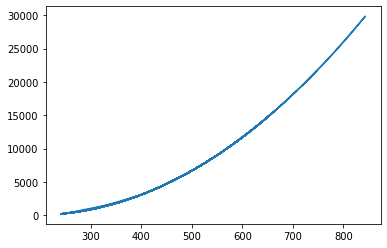

In [ ]:
plt.plot(x_h, y_h)

In [ ]:
# df_intp.to_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/잠수교_유량_수위_보간/청담대교_cuve_fit.csv', encoding = 'cp949')

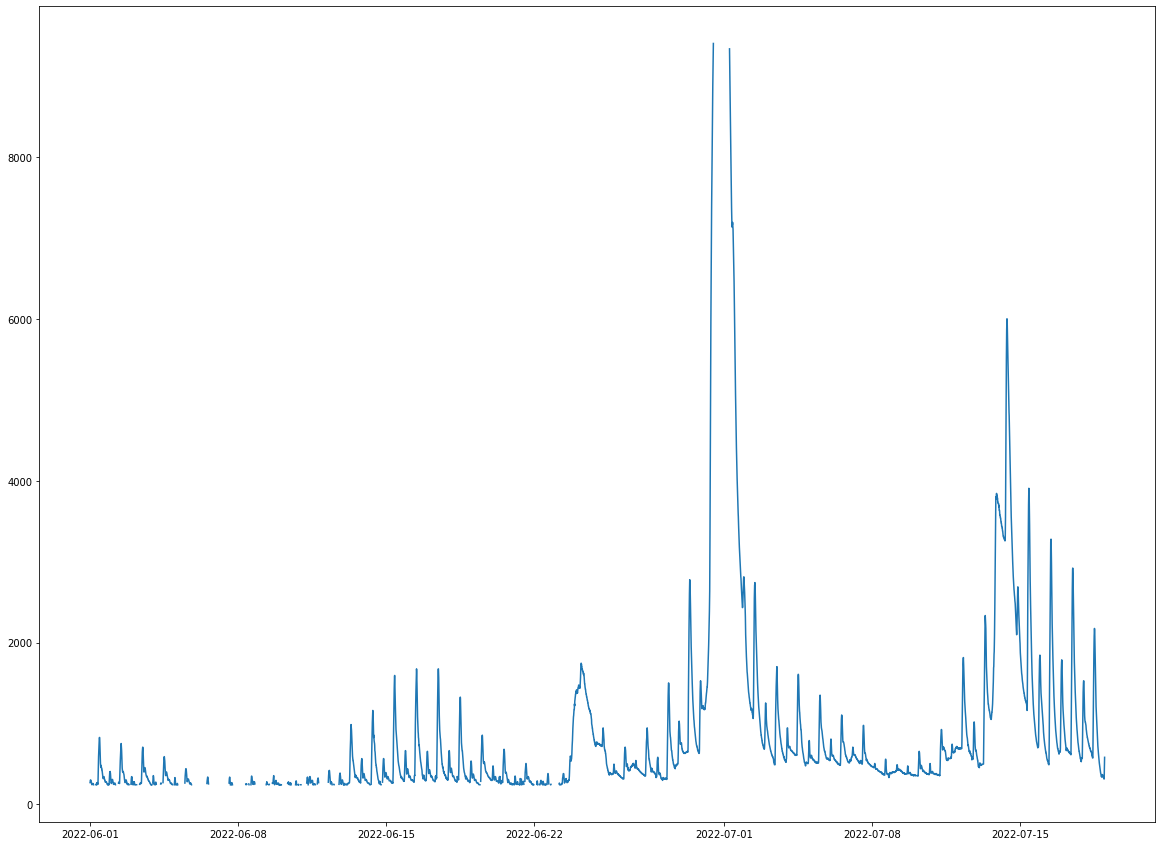

In [ ]:
x4 = df_intp['청담대교_유량']['2022-06-01 00:00:00':]
plt.figure(figsize = (20, 15))
plt.plot(x4)

### 2022.5.30 이후 결측치 처리

In [ ]:
df_intp.reset_index(inplace = True)

In [ ]:
nanIndex = df_intp[df_intp['청담대교_유량'].isnull()].index

In [ ]:
nanIndex

Int64Index([269449, 269450, 269452, 269453, 269454, 269455, 269456, 269457,
            269458, 269459,
            ...
            273770, 273771, 273772, 273773, 273774, 273775, 273776, 273777,
            273778, 273779],
           dtype='int64', length=1216)

In [ ]:
unconsecutive = []
consecutive = []

i = 0
while i < len(nanIndex):
    if nanIndex[i]+1 in nanIndex: # 다음 거가 nanIndex 안에 있으면 다음 거까지 consecutive에 추가
        consecutive.extend([nanIndex[i], nanIndex[i+1]])
        try:
            i += 2
        except: #i가 len(nanIndex2) - 1
            break
    elif nanIndex[i]-1 in nanIndex: #다음 거는 nanIndex 안에 없지만 consecutive로 들어가야 하는 경우(반복 구간의 마지막 원소)
        consecutive.append(nanIndex[i])
        i += 1
    else:
        unconsecutive.append(nanIndex[i])
        i += 1

In [ ]:
unconsecutive

[269841,
 270484,
 270711,
 270724,
 270944,
 270947,
 271152,
 271165,
 271333,
 271338,
 272314,
 272365,
 272367]

In [ ]:
consecutive

[269449,
 269450,
 269452,
 269453,
 269454,
 269455,
 269456,
 269457,
 269458,
 269459,
 269460,
 269461,
 269462,
 269463,
 269476,
 269477,
 269598,
 269599,
 269600,
 269601,
 269602,
 269603,
 269604,
 269605,
 269606,
 269607,
 269608,
 269609,
 269610,
 269611,
 269612,
 269613,
 269614,
 269615,
 269616,
 269617,
 269690,
 269691,
 269692,
 269693,
 269694,
 269695,
 269696,
 269697,
 269698,
 269699,
 269700,
 269701,
 269702,
 269714,
 269715,
 269716,
 269717,
 269730,
 269731,
 269732,
 269733,
 269734,
 269735,
 269736,
 269742,
 269743,
 269744,
 269745,
 269746,
 269747,
 269748,
 269749,
 269750,
 269751,
 269752,
 269753,
 269754,
 269755,
 269756,
 269757,
 269758,
 269759,
 269760,
 269761,
 269772,
 269773,
 269847,
 269848,
 269849,
 269850,
 269861,
 269862,
 269863,
 269864,
 269865,
 269866,
 269876,
 269877,
 269878,
 269879,
 269880,
 269881,
 269882,
 269883,
 269884,
 269885,
 269886,
 269887,
 269888,
 269889,
 269890,
 269891,
 269892,
 269893,
 269894,
 

In [ ]:
# consecutive 내에서 구간별로 분리
dummy = []
consecutive2 = [] # 2차원 consecutive
for i in consecutive: 
    dummy.append(i)
    if i+1 not in consecutive:
        if i == consecutive[-2]: #만약 마지막 반복일 경우, consecutive[-1]을 추가로 넣어주어야 함
            dummy.append(i+1)
            consecutive2.append(dummy)
        else: 
            consecutive2.append(dummy)
            dummy= []  

In [ ]:
sum(consecutive2, []) == consecutive

True

In [ ]:
print(len(unconsecutive))
for i in range(len(consecutive2)):
  print(len(consecutive2[i]), consecutive2[i][0], consecutive2[i][-1])

13
2 269449 269450
12 269452 269463
2 269476 269477
20 269598 269617
13 269690 269702
4 269714 269717
7 269730 269736
20 269742 269761
2 269772 269773
4 269847 269850
6 269861 269866
29 269876 269904
11 269910 269920
12 269986 269997
7 270008 270014
48 270022 270069
104 270116 270219
115 270232 270346
23 270348 270370
6 270381 270386
88 270395 270482
9 270492 270500
3 270502 270504
12 270508 270519
5 270533 270537
76 270548 270623
8 270634 270641
20 270646 270665
2 270713 270714
42 270728 270769
7 270779 270785
29 270795 270823
10 270832 270841
13 270846 270858
38 270862 270899
3 270911 270913
13 270959 270971
65 270982 271046
10 271074 271083
33 271087 271119
2 271162 271163
3 271167 271169
2 271335 271336
9 271407 271415
4 272081 272084
9 272341 272349
6 272380 272385
20 272447 272466
11 272474 272484
3 272489 272491
5 272503 272507
6 272519 272524
6 272531 272536
12 272550 272561
55 272565 272619
8 272624 272631
109 273671 273779


### 보간 처리


In [ ]:
unconsecutive2 = sum([[i-1, i, i+1] for i in unconsecutive], [])

In [ ]:
len(unconsecutive2) == len(unconsecutive) * 3

True

In [ ]:
df_intp['청담대교_유량'].loc[unconsecutive2] = df_intp['청담대교_유량'].loc[unconsecutive2].interpolate()
df_intp['청담대교_유량'].loc[unconsecutive2]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


269840    243.290
269841    243.290
269842    243.290
270483    243.290
270484    245.845
270485    248.400
270710    243.290
270711    243.290
270712    243.290
270723    243.290
270724    243.290
270725    243.290
270943    248.400
270944    245.845
270945    243.290
270946    243.290
270947    245.845
270948    248.400
271151    243.290
271152    243.290
271153    243.290
271164    243.290
271165    243.290
271166    243.290
271332    243.290
271333    243.290
271334    243.290
271337    243.290
271338    245.845
271339    248.400
272313    243.290
272314    248.430
272315    253.570
272364    243.290
272365    243.290
272366    243.290
272366    243.290
272367    248.430
272368    253.570
Name: 청담대교_유량, dtype: float64

## Arima - 100


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

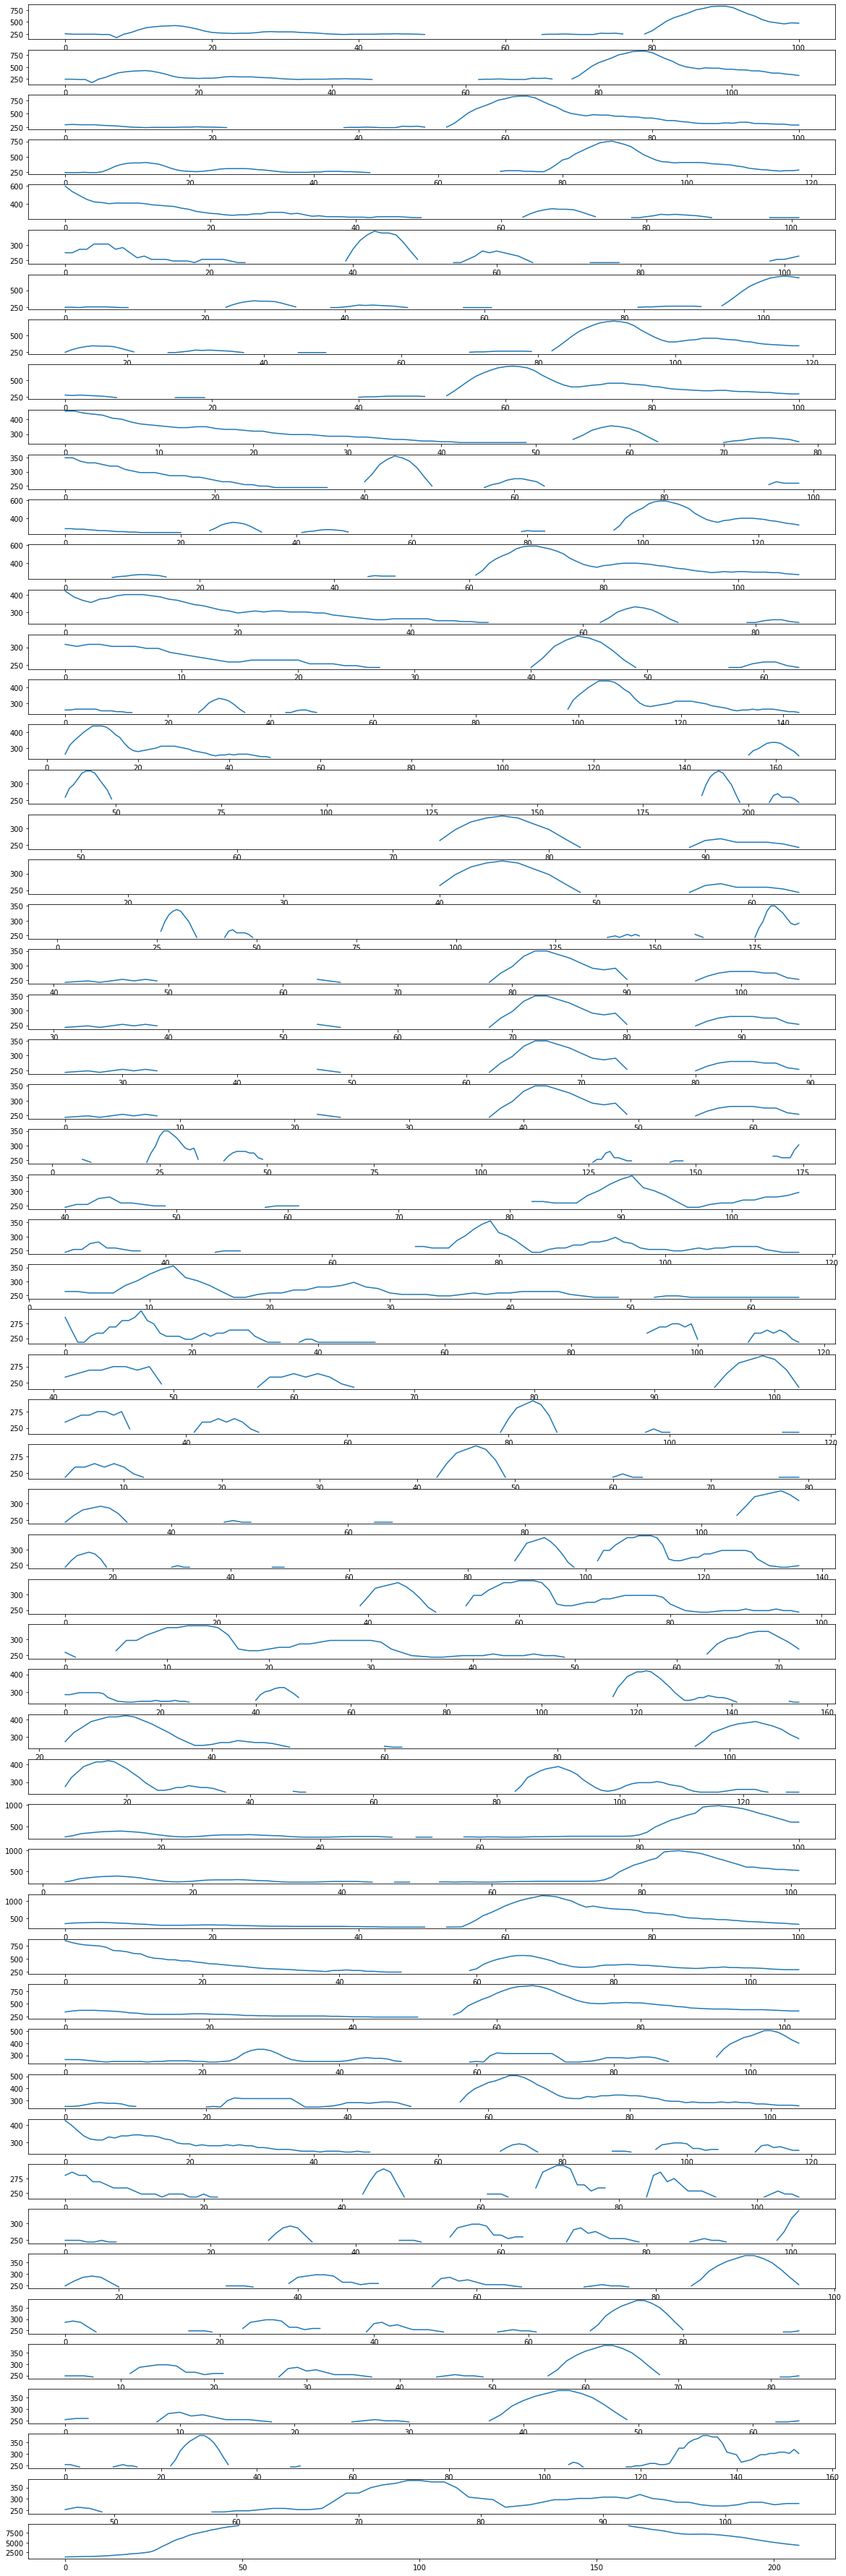

In [ ]:
f, axes = plt.subplots(len(consecutive2), 1)
f.set_size_inches((20, 65))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(len(consecutive2)):
    start = consecutive2[i][0]-50
    end = consecutive2[i][-1]+50
    x = range(len(df_intp['날짜'][start:end]))
    y = df_intp['청담대교_유량'][start:end]
    axes[i].plot(x, y)

plt.show()

In [ ]:
n = 100

for lst in consecutive2:
  start = lst[0]
  model = pm.auto_arima(df_intp['청담대교_유량'][start-n:start], seasonal = True)
  df_intp['청담대교_유량'].loc[lst] = model.predict(len(lst)).values
  print(f'{consecutive2.index(lst)+1}번째 구간 결측치 처리 완료')
  print(model.predict(len(lst)))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1번째 구간 결측치 처리 완료
269449    241.134575
269450    239.175541
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


2번째 구간 결측치 처리 완료
269452    244.530235
269453    246.457903
269454    247.191940
269455    247.191940
269456    247.191940
269457    247.191940
269458    247.191940
269459    247.191940
269460    247.191940
269461    247.191940
269462    247.191940
269463    247.191940
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


3번째 구간 결측치 처리 완료
269476    247.558751
269477    243.603308
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4번째 구간 결측치 처리 완료
269598    239.078540
269599    236.409142
269600    234.858384
269601    234.508479
269602    235.275557
269603    236.880048
269604    238.922445
269605    240.971831
269606    242.649259
269607    243.691242
269608    243.984088
269609    243.566362
269610    242.602953
269611    241.339041
269612    240.044940
269613    238.963126
269614    238.266939
269615    238.037153
269616    238.258515
269617    238.834426
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


5번째 구간 결측치 처리 완료
269690    242.991618
269691    244.969196
269692    248.822260
269693    254.074783
269694    260.253148
269695    266.930772
269696    273.750062
269697    280.429508
269698    286.761533
269699    292.605057
269700    297.875486
269701    302.533909
269702    306.576658
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


6번째 구간 결측치 처리 완료
269714    229.242361
269715    207.594465
269716    190.054552
269717    177.400606
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


7번째 구간 결측치 처리 완료
269730    241.499260
269731    240.813000
269732    241.201606
269733    242.442180
269734    244.186733
269735    246.043746
269736    247.656226
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


8번째 구간 결측치 처리 완료
269742    243.120338
269743    243.302306
269744    243.730555
269745    244.250703
269746    244.708594
269747    244.991561
269748    245.051941
269749    244.909380
269750    244.634738
269751    244.322859
269752    244.063301
269753    243.917187
269754    243.905408
269755    244.009500
269756    244.182923
269757    244.368054
269758    244.513403
269759    244.586430
269760    244.579208
269761    244.506588
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


9번째 구간 결측치 처리 완료
269772    257.376944
269773    256.501884
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


10번째 구간 결측치 처리 완료
269847    244.425081
269848    246.713453
269849    250.050745
269850    254.245670
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


11번째 구간 결측치 처리 완료
269861    219.847681
269862    196.691042
269863    180.176720
269864    170.706017
269865    167.944523
269866    170.982138
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


12번째 구간 결측치 처리 완료
269876    233.140965
269877    217.767380
269878    203.977030
269879    193.196498
269880    186.439727
269881    184.220062
269882    186.522384
269883    192.834979
269884    202.234208
269885    213.509664
269886    225.313711
269887    236.317585
269888    245.356487
269889    251.548355
269890    254.374738
269891    253.717049
269892    249.846761
269893    243.373246
269894    235.157429
269895    226.202702
269896    217.536399
269897    210.095409
269898    204.628284
269899    201.623647
269900    201.271303
269901    203.458431
269902    207.799291
269903    213.693259
269904    220.403182
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


13번째 구간 결측치 처리 완료
269910    253.299835
269911    245.652385
269912    236.983000
269913    228.475380
269914    221.206576
269915    216.016896
269916    213.419548
269917    213.558714
269918    216.217891
269919    220.873787
269920    226.785568
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


14번째 구간 결측치 처리 완료
269986    244.867002
269987    247.705708
269988    251.510776
269989    256.011440
269990    260.964668
269991    266.157014
269992    271.405342
269993    276.556599
269994    281.486803
269995    286.099413
269996    290.323226
269997    294.109957
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


15번째 구간 결측치 처리 완료
270008    224.746391
270009    209.807016
270010    198.891556
270011    192.070713
270012    189.120541
270013    189.587909
270014    192.860660
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


16번째 구간 결측치 처리 완료
270022    234.873445
270023    225.287639
270024    215.425578
270025    206.143377
270026    198.190066
270027    192.151219
270028    188.410276
270029    187.129637
270030    188.251810
270031    191.519150
270032    196.509261
270033    202.681996
270034    209.433281
270035    216.150730
270036    222.266209
270037    227.301088
270038    230.900839
270039    232.856754
270040    233.113814
270041    231.764982
270042    229.033302
270043    225.244175
270044    220.790811
270045    216.096254
270046    211.575445
270047    207.600534
270048    204.472171
270049    202.398805
270050    201.485214
270051    201.730612
270052    203.035849
270053    205.218478
270054    208.033875
270055    211.200210
270056    214.424898
270057    217.430168
270058    219.975649
270059    221.876256
270060    223.014169
270061    223.344296
270062    222.893183
270063    221.751925
270064    220.064066
270065    218.009865
270066    215.788510
270067    213.599926
270068    211.62

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


17번째 구간 결측치 처리 완료
270116    239.286098
270117    236.148871
270118    233.690721
270119    231.764656
270120    230.255503
             ...    
270215    224.792604
270216    224.792604
270217    224.792604
270218    224.792604
270219    224.792604
Length: 104, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


18번째 구간 결측치 처리 완료
270232    229.942773
270233    212.295014
270234    196.948483
270235    187.155211
270236    183.402088
             ...    
270342    250.235670
270343    250.022054
270344    250.034833
270345    250.259483
270346    250.664672
Length: 115, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


19번째 구간 결측치 처리 완료
270348    229.372587
270349    213.918529
270350    201.799217
270351    193.889452
270352    190.706487
270353    192.378372
270354    198.644057
270355    208.884415
270356    222.180882
270357    237.396348
270358    253.271271
270359    268.526978
270360    281.967766
270361    292.573702
270362    299.577019
270363    302.516453
270364    301.265795
270365    296.035071
270366    287.344972
270367    275.977287
270368    262.905887
270369    249.214285
270370    236.006651
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


20번째 구간 결측치 처리 완료
270381    222.877768
270382    209.802774
270383    204.210732
270384    205.279567
270385    211.574821
270386    221.352830
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


21번째 구간 결측치 처리 완료
270395    234.887883
270396    230.457702
270397    229.630407
270398    231.700247
270399    235.781753
             ...    
270478    252.967896
270479    252.967987
270480    252.967975
270481    252.967886
270482    252.967746
Length: 88, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


22번째 구간 결측치 처리 완료
270492    245.278573
270493    247.903984
270494    246.640213
270495    246.673996
270496    248.042552
270497    249.044894
270498    249.779017
270499    250.316695
270500    250.710494
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


23번째 구간 결측치 처리 완료
270502    244.063955
270503    243.970171
270504    241.154711
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


24번째 구간 결측치 처리 완료
270508    250.489262
270509    242.483672
270510    241.850808
270511    248.179037
270512    242.138842
270513    245.266727
270514    248.826316
270515    242.954739
270516    246.246813
270517    246.445190
270518    241.800418
270519    245.678724
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25번째 구간 결측치 처리 완료
270533    250.891473
270534    240.867660
270535    227.852355
270536    224.133915
270537    231.228281
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


26번째 구간 결측치 처리 완료
270548    244.669397
270549    236.489871
270550    237.086637
270551    241.331450
270552    246.112323
             ...    
270619    256.820500
270620    256.820500
270621    256.820500
270622    256.820500
270623    256.820500
Length: 76, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


27번째 구간 결측치 처리 완료
270634    248.842395
270635    250.288248
270636    252.772228
270637    255.303278
270638    257.797389
270639    259.508054
270640    260.556375
270641    260.605184
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


28번째 구간 결측치 처리 완료
270646    255.108486
270647    256.338790
270648    257.752088
270649    258.304553
270650    256.678253
270651    255.906531
270652    255.106127
270653    254.680216
270654    254.979114
270655    255.271229
270656    255.633543
270657    255.887167
270658    255.902124
270659    255.837351
270660    255.707091
270661    255.587562
270662    255.536930
270663    255.532405
270664    255.567297
270665    255.613456
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


29번째 구간 결측치 처리 완료
270713    247.958468
270714    252.928355
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


30번째 구간 결측치 처리 완료
270728    244.731867
270729    247.865356
270730    252.212556
270731    256.745374
270732    259.812103
270733    260.711775
270734    260.711775
270735    260.711775
270736    260.711775
270737    260.711775
270738    260.711775
270739    260.711775
270740    260.711775
270741    260.711775
270742    260.711775
270743    260.711775
270744    260.711775
270745    260.711775
270746    260.711775
270747    260.711775
270748    260.711775
270749    260.711775
270750    260.711775
270751    260.711775
270752    260.711775
270753    260.711775
270754    260.711775
270755    260.711775
270756    260.711775
270757    260.711775
270758    260.711775
270759    260.711775
270760    260.711775
270761    260.711775
270762    260.711775
270763    260.711775
270764    260.711775
270765    260.711775
270766    260.711775
270767    260.711775
270768    260.711775
270769    260.711775
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


31번째 구간 결측치 처리 완료
270779    249.081354
270780    243.630823
270781    243.059915
270782    245.357376
270783    248.888900
270784    252.514766
270785    255.571712
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


32번째 구간 결측치 처리 완료
270795    244.948302
270796    243.899625
270797    244.821014
270798    247.671967
270799    250.492280
270800    252.127015
270801    252.764305
270802    253.089756
270803    253.507100
270804    254.009166
270805    254.439446
270806    254.719680
270807    254.883336
270808    254.998199
270809    255.102420
270810    255.197824
270811    255.274182
270812    255.328217
270813    255.365495
270814    255.393512
270815    255.416557
270816    255.435567
270817    255.450383
270818    255.461357
270819    255.469451
270820    255.475650
270821    255.480560
270822    255.484445
270823    255.487448
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


33번째 구간 결측치 처리 완료
270832    232.783292
270833    226.592238
270834    232.500605
270835    245.867109
270836    260.493304
270837    271.087280
270838    274.884074
270839    272.048800
270840    264.987078
270841    257.035461
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


34번째 구간 결측치 처리 완료
270846    250.661555
270847    254.092732
270848    257.907188
270849    260.668096
270850    261.621962
270851    260.819068
270852    258.922615
270853    256.841323
270854    255.353945
270855    254.860739
270856    255.322831
270857    256.370531
270858    257.505803
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


35번째 구간 결측치 처리 완료
270862    243.959625
270863    250.766623
270864    258.177700
270865    263.349815
270866    264.852170
270867    262.897118
270868    258.920573
270869    254.801028
270870    252.078729
270871    251.461264
270872    252.737283
270873    255.045111
270874    257.323951
270875    258.744253
270876    258.963793
270877    258.151801
270878    256.820544
270879    255.566145
270880    254.832567
270881    254.780473
270882    255.287231
270883    256.050801
270884    256.737797
270885    257.112244
270886    257.101847
270887    256.790456
270888    256.354848
270889    255.980581
270890    255.792129
270891    255.819946
270892    256.008854
270893    256.256084
270894    256.458854
270895    256.552062
270896    256.524318
270897    256.410949
270898    256.271333
270899    256.162120
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


36번째 구간 결측치 처리 완료
270911    234.752355
270912    232.616278
270913    235.455507
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


37번째 구간 결측치 처리 완료
270959    242.481684
270960    244.641677
270961    248.574831
270962    253.299718
270963    258.077650
270964    262.407587
270965    265.998666
270966    268.730497
270967    270.609262
270968    271.725452
270969    272.216968
270970    272.239571
270971    271.945238
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


38번째 구간 결측치 처리 완료
270982    255.126951
270983    246.064273
270984    241.990632
270985    242.213175
270986    245.745594
             ...    
271042    274.359490
271043    274.358083
271044    274.358999
271045    274.361621
271046    274.365293
Length: 65, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


39번째 구간 결측치 처리 완료
271074    237.355894
271075    235.319100
271076    236.751669
271077    240.922897
271078    247.175080
271079    254.727032
271080    262.925804
271081    271.119626
271082    278.817352
271083    285.597203
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


40번째 구간 결측치 처리 완료
271087    244.805137
271088    248.219490
271089    252.717567
271090    257.896423
271091    263.302623
271092    268.590439
271093    273.482386
271094    277.782386
271095    281.366901
271096    284.178252
271097    286.214188
271098    287.516858
271099    288.161379
271100    288.244893
271101    287.876589
271102    287.169079
271103    286.231316
271104    285.163172
271105    284.051623
271106    282.968441
271107    281.969218
271108    281.093501
271109    280.365810
271110    279.797304
271111    279.387858
271112    279.128364
271113    279.003068
271114    278.991818
271115    279.072091
271116    279.220755
271117    279.415503
271118    279.635945
271119    279.864378
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


41번째 구간 결측치 처리 완료
271162    243.223472
271163    245.959637
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


42번째 구간 결측치 처리 완료
271167    246.036301
271168    250.093922
271169    254.541868
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


43번째 구간 결측치 처리 완료
271335    243.29
271336    243.29
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


44번째 구간 결측치 처리 완료
271407    247.331136
271408    253.721632
271409    262.358979
271410    272.730126
271411    284.465257
271412    297.190474
271413    310.571474
271414    324.303827
271415    338.116936
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


45번째 구간 결측치 처리 완료
272081    243.551832
272082    243.911484
272083    244.340638
272084    244.765872
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


46번째 구간 결측치 처리 완료
272341    241.909666
272342    239.006474
272343    239.298034
272344    241.856106
272345    245.549180
272346    249.325417
272347    252.402554
272348    254.351883
272349    255.088259
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


47번째 구간 결측치 처리 완료
272380    241.484588
272381    240.923348
272382    244.319047
272383    249.628605
272384    255.325055
272385    260.420482
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


48번째 구간 결측치 처리 완료
272447    245.860803
272448    249.995973
272449    254.955456
272450    260.211260
272451    265.401173
272452    270.290074
272453    274.738161
272454    278.675303
272455    282.080712
272456    284.967101
272457    287.368603
272458    289.331755
272459    290.908947
272460    292.153819
272461    293.118173
272462    293.850029
272463    294.392532
272464    294.783481
272465    295.055274
272466    295.235153
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


49번째 구간 결측치 처리 완료
272474    230.176686
272475    221.901469
272476    216.679356
272477    213.383918
272478    211.304316
272479    209.991974
272480    209.163815
272481    208.641201
272482    208.311403
272483    208.103283
272484    207.971947
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


50번째 구간 결측치 처리 완료
272489    238.382159
272490    230.592200
272491    220.849400
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


51번째 구간 결측치 처리 완료
272503    258.79
272504    258.79
272505    258.79
272506    258.79
272507    258.79
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


52번째 구간 결측치 처리 완료
272519    244.586924
272520    246.692189
272521    248.667975
272522    250.388765
272523    251.866091
272524    253.130711
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


53번째 구간 결측치 처리 완료
272531    244.089678
272532    245.691092
272533    247.213085
272534    248.531096
272535    249.651813
272536    250.601129
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


54번째 구간 결측치 처리 완료
272550    232.051220
272551    216.149091
272552    206.000051
272553    201.331078
272554    201.546042
272555    205.819440
272556    213.189992
272557    222.647816
272558    233.210403
272559    243.984123
272560    254.209552
272561    263.290244
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


55번째 구간 결측치 처리 완료
272565    251.009656
272566    253.722236
272567    256.327234
272568    258.660533
272569    260.607449
272570    262.101717
272571    263.121244
272572    263.681532
272573    263.827653
272574    263.625617
272575    263.153854
272576    262.495384
272577    261.731112
272578    260.934502
272579    260.167763
272580    259.479531
272581    258.903934
272582    258.460858
272583    258.157166
272584    257.988615
272585    257.942201
272586    257.998692
272587    258.135134
272588    258.327159
272589    258.550964
272590    258.784889
272591    259.010551
272592    259.213539
272593    259.383698
272594    259.515063
272595    259.605509
272596    259.656189
272597    259.670853
272598    259.655104
272599    259.615659
272600    259.559670
272601    259.494139
272602    259.425452
272603    259.359041
272604    259.299175
272605    259.248876
272606    259.209932
272607    259.183001
272608    259.167770
272609    259.163158
272610    259.167534
272611    259.17

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


56번째 구간 결측치 처리 완료
272624    234.788334
272625    231.081747
272626    229.975682
272627    231.239166
272628    234.499511
272629    239.285819
272630    245.074332
272631    251.332136
dtype: float64
57번째 구간 결측치 처리 완료
273671     9538.33
273672     9671.02
273673     9803.71
273674     9936.40
273675    10069.09
            ...   
273775    23338.09
273776    23470.78
273777    23603.47
273778    23736.16
273779    23868.85
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


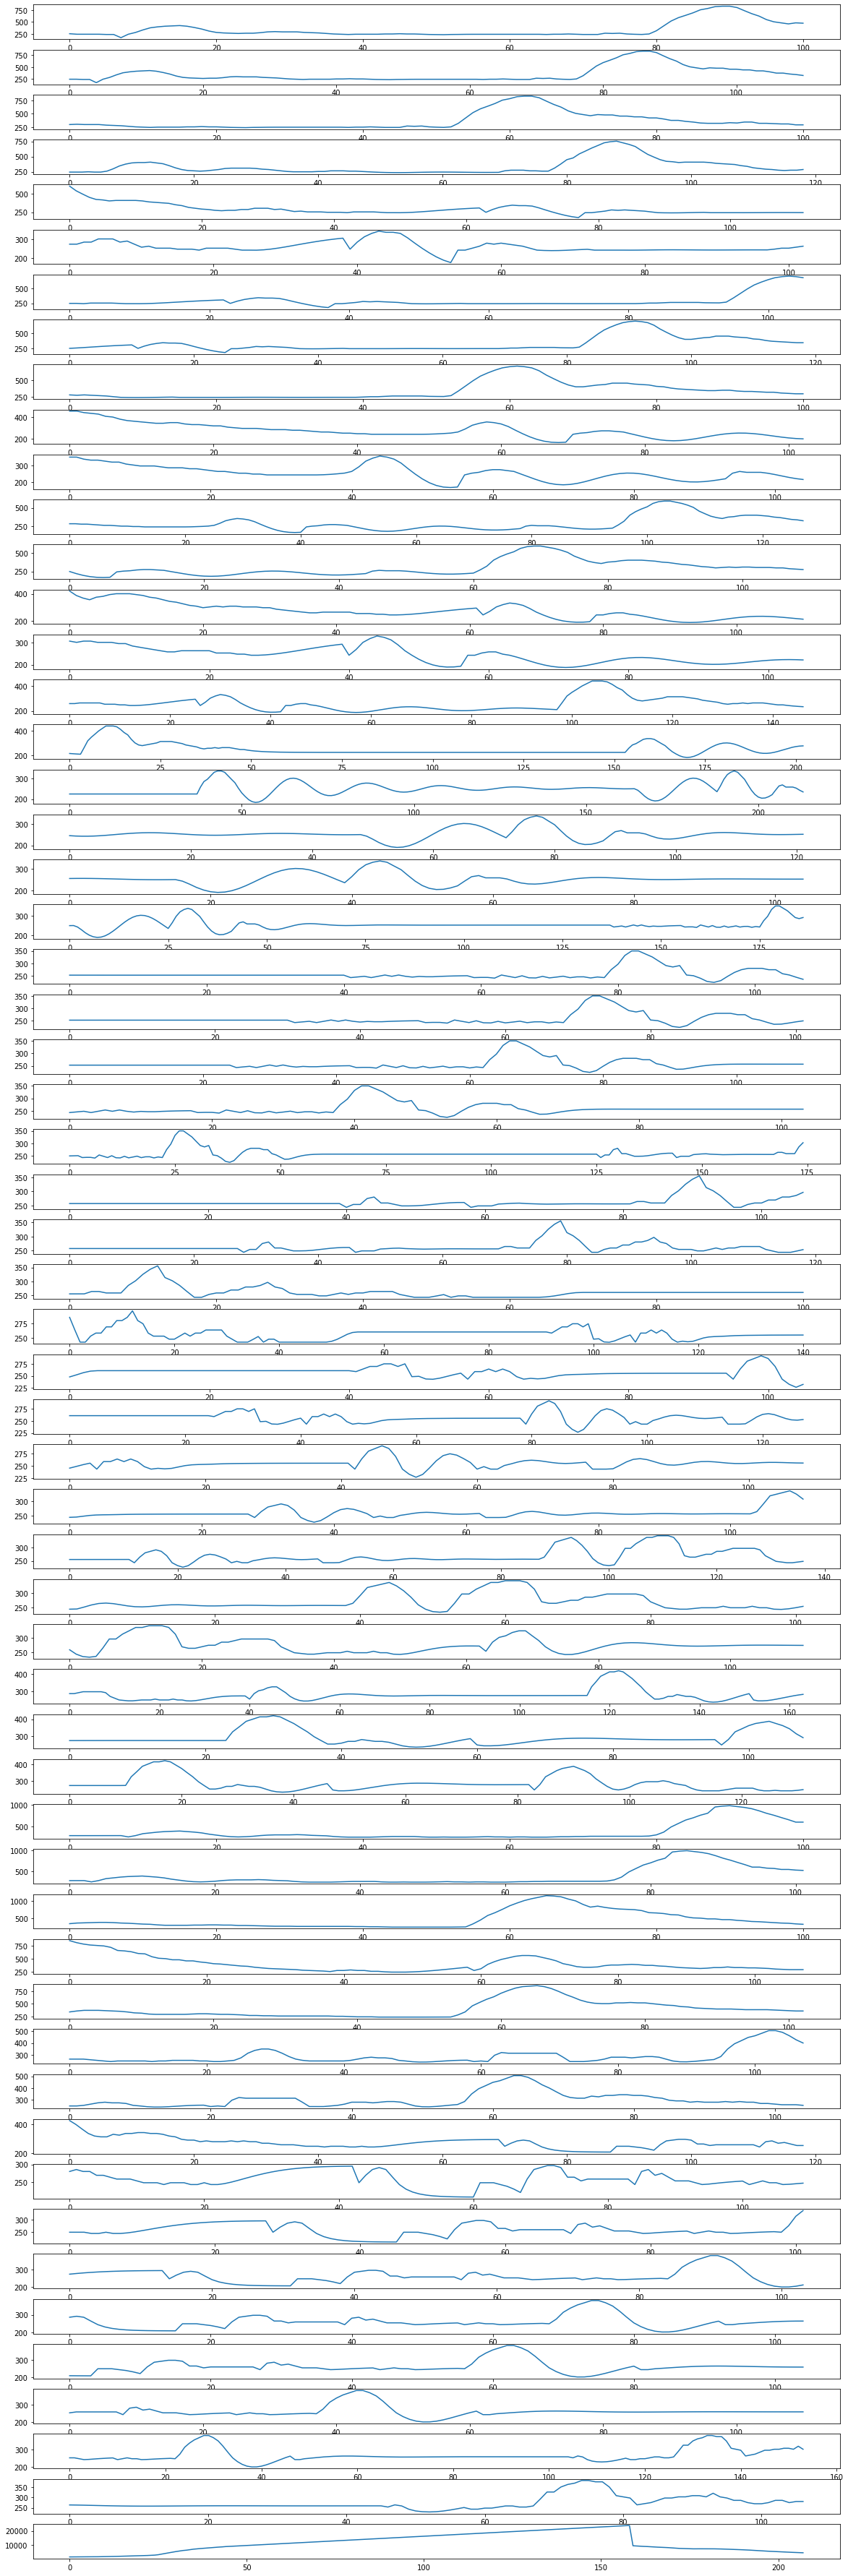

In [ ]:
f, axes = plt.subplots(len(consecutive2), 1)
f.set_size_inches((20, 65))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(len(consecutive2)):
    start = consecutive2[i][0]-50
    end = consecutive2[i][-1]+50
    x = range(len(df_intp['날짜'][start:end]))
    y = df_intp['청담대교_유량'][start:end]
    axes[i].plot(x, y)

plt.show()

### Arima - 432

In [ ]:
n = 432

for lst in consecutive2:
  start = lst[0]
  model = pm.auto_arima(df_intp['청담대교_유량'][start-n:start], seasonal = True)
  df_intp['청담대교_유량'].loc[lst] = model.predict(len(lst)).values
  print(f'{consecutive2.index(lst)+1}번째 구간 결측치 처리 완료')
  print(model.predict(len(lst)))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1번째 구간 결측치 처리 완료
269449    241.885315
269450    241.510882
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


2번째 구간 결측치 처리 완료
269452    246.280974
269453    250.683827
269454    256.134466
269455    262.240869
269456    268.634634
269457    275.000649
269458    281.090732
269459    286.726124
269460    291.792788
269461    296.232567
269462    300.032452
269463    303.213540
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


3번째 구간 결측치 처리 완료
269476    252.098261
269477    249.237711
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4번째 구간 결측치 처리 완료
269598    241.812712
269599    242.193204
269600    244.646136
269601    248.944734
269602    254.669627
269603    261.352274
269604    268.552499
269605    275.895640
269606    283.085635
269607    289.904440
269608    296.204285
269609    301.896759
269610    306.941102
269611    311.333043
269612    315.094881
269613    318.267074
269614    320.901401
269615    323.055580
269616    324.789201
269617    326.160768
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


5번째 구간 결측치 처리 완료
269690    243.061832
269691    244.200817
269692    246.780306
269693    250.695396
269694    255.714197
269695    261.528375
269696    267.798854
269697    274.193899
269698    280.418027
269699    286.231329
269700    291.459668
269701    295.996908
269702    299.800733
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


6번째 구간 결측치 처리 완료
269714    232.459420
269715    215.092163
269716    202.770778
269717    195.995120
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


7번째 구간 결측치 처리 완료
269730    237.308359
269731    233.488270
269732    232.213797
269733    233.497329
269734    237.079194
269735    242.524346
269736    249.308708
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


8번째 구간 결측치 처리 완료
269742    244.926782
269743    247.572076
269744    251.220899
269745    255.738801
269746    260.911624
269747    266.488537
269748    272.216490
269749    277.865466
269750    283.244826
269751    288.211750
269752    292.673147
269753    296.582620
269754    299.934065
269755    302.753356
269756    305.089332
269757    307.005060
269758    308.570049
269759    309.853850
269760    310.921216
269761    311.828844
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


9번째 구간 결측치 처리 완료
269772    258.337025
269773    258.468869
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


10번째 구간 결측치 처리 완료
269847    245.461223
269848    248.809191
269849    253.399821
269850    258.829466
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


11번째 구간 결측치 처리 완료
269861    222.264170
269862    202.274318
269863    189.090741
269864    182.450810
269865    181.783229
269866    186.171290
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


12번째 구간 결측치 처리 완료
269876    238.351805
269877    230.117318
269878    224.644205
269879    222.367106
269880    223.290546
269881    227.090870
269882    233.223764
269883    241.026505
269884    249.807047
269885    258.915040
269886    267.792607
269887    276.005022
269888    283.253189
269889    289.370986
269890    294.311225
269891    298.124089
269892    300.931714
269893    302.902087
269894    304.224744
269895    305.090034
269896    305.672995
269897    306.122209
269898    306.553517
269899    307.048021
269900    307.653589
269901    308.388910
269902    309.249180
269903    310.212517
269904    311.246388
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


13번째 구간 결측치 처리 완료
269910    261.916457
269911    266.990936
269912    273.305844
269913    280.137190
269914    286.810952
269915    292.756225
269916    297.542210
269917    300.897877
269918    302.714867
269919    303.035583
269920    302.029489
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


14번째 구간 결측치 처리 완료
269986    244.289913
269987    246.687804
269988    250.349202
269989    255.015838
269990    260.354964
269991    266.007070
269992    271.627565
269993    276.919401
269994    281.655038
269995    285.687509
269996    288.951457
269997    291.455843
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


15번째 구간 결측치 처리 완료
270008    224.639409
270009    210.379294
270010    201.568751
270011    198.481697
270012    200.740831
270013    207.488371
270014    217.569378
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


16번째 구간 결측치 처리 완료
270022    237.766269
270023    233.149848
270024    230.216061
270025    229.382392
270026    230.741462
270027    234.119658
270028    239.150353
270029    245.351449
270030    252.198616
270031    259.187778
270032    265.882805
270033    271.946632
270034    277.156074
270035    281.402172
270036    284.678970
270037    287.064199
270038    288.695458
270039    289.745176
270040    290.397117
270041    290.826473
270042    291.184799
270043    291.590329
270044    292.123539
270045    292.827350
270046    293.711011
270047    294.756513
270048    295.926407
270049    297.171938
270050    298.440636
270051    299.682705
270052    300.855830
270053    301.928226
270054    302.880004
270055    303.703044
270056    304.399695
270057    304.980680
270058    305.462570
270059    305.865168
270060    306.209085
270061    306.513721
270062    306.795754
270063    307.068203
270064    307.340031
270065    307.616226
270066    307.898256
270067    308.184765
270068    308.47

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


17번째 구간 결측치 처리 완료
270116    242.630566
270117    243.552287
270118    245.999451
270119    249.718170
270120    254.329261
             ...    
270215    303.018986
270216    303.023673
270217    303.028040
270218    303.032110
270219    303.035907
Length: 104, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


18번째 구간 결측치 처리 완료
270232    236.536672
270233    224.288885
270234    217.820340
270235    217.498881
270236    223.048648
             ...    
270342    300.858899
270343    300.865368
270344    300.871359
270345    300.876392
270346    300.880189
Length: 115, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


19번째 구간 결측치 처리 완료
270348    220.225897
270349    203.426692
270350    188.648942
270351    177.748024
270352    171.852688
270353    171.280884
270354    175.576991
270355    183.653072
270356    194.004007
270357    204.959112
270358    214.931527
270359    222.630843
270360    227.213056
270361    228.353258
270362    226.238702
270363    221.491223
270364    215.036911
270365    207.946512
270366    201.271718
270367    195.900581
270368    192.450250
270369    191.208244
270370    192.125534
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


20번째 구간 결측치 처리 완료
270381    226.271943
270382    215.769569
270383    213.557844
270384    219.411979
270385    231.638418
270386    247.991987
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


21번째 구간 결측치 처리 완료
270395    238.956642
270396    237.040792
270397    237.949189
270398    241.487470
270399    247.096100
             ...    
270478    281.599058
270479    281.604408
270480    281.598602
270481    281.584424
270482    281.565693
Length: 88, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


22번째 구간 결측치 처리 완료
270492    248.858663
270493    248.355029
270494    247.048612
270495    245.218346
270496    243.207170
270497    241.360487
270498    239.969128
270499    239.225826
270500    239.201309
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


23번째 구간 결측치 처리 완료
270502    245.593714
270503    248.108426
270504    250.457878
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


24번째 구간 결측치 처리 완료
270508    239.721934
270509    235.967539
270510    232.664865
270511    230.325210
270512    229.258579
270513    229.538592
270514    231.009456
270515    233.330446
270516    236.047446
270517    238.677506
270518    240.791310
270519    242.080053
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25번째 구간 결측치 처리 완료
270533    246.286987
270534    244.073301
270535    246.784574
270536    253.517473
270537    262.825107
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


26번째 구간 결측치 처리 완료
270548    247.961954
270549    244.411957
270550    243.276310
270551    244.499425
270552    247.662289
             ...    
270619    258.057336
270620    258.075117
270621    258.026485
270622    257.925456
270623    257.792886
Length: 76, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


27번째 구간 결측치 처리 완료
270634    246.957018
270635    246.874027
270636    248.070753
270637    250.270991
270638    253.069414
270639    256.010743
270640    258.667364
270641    260.703418
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


28번째 구간 결측치 처리 완료
270646    247.948249
270647    247.971657
270648    248.423210
270649    249.192931
270650    250.130902
270651    251.074449
270652    251.874860
270653    252.419470
270654    252.646068
270655    252.548067
270656    252.170467
270657    251.598078
270658    250.938572
270659    250.303483
270660    249.790339
270661    249.468616
270662    249.371388
270663    249.493452
270664    249.795633
270665    250.214041
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


29번째 구간 결측치 처리 완료
270713    244.273684
270714    246.304749
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


30번째 구간 결측치 처리 완료
270728    245.171556
270729    247.585089
270730    250.372962
270731    253.353204
270732    256.176733
270733    258.647723
270734    260.680517
270735    262.263617
270736    263.431224
270737    264.241921
270738    264.763614
270739    265.063613
270740    265.202712
270741    265.232224
270742    265.193063
270743    265.116140
270744    265.023518
270745    264.929913
270746    264.844276
270747    264.771268
270748    264.712538
270749    264.667775
270750    264.635513
270751    264.613728
270752    264.600242
270753    264.592986
270754    264.590144
270755    264.590219
270756    264.592043
270757    264.594754
270758    264.597751
270759    264.600645
270760    264.603214
270761    264.605351
270762    264.607033
270763    264.608288
270764    264.609170
270765    264.609747
270766    264.610088
270767    264.610256
270768    264.610304
270769    264.610276
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


31번째 구간 결측치 처리 완료
270779    240.470006
270780    234.200054
270781    229.915015
270782    230.398925
270783    233.929391
270784    239.055719
270785    244.661574
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


32번째 구간 결측치 처리 완료
270795    240.927490
270796    240.531114
270797    242.534510
270798    246.189391
270799    250.554832
270800    254.891709
270801    258.689648
270802    261.658370
270803    263.695340
270804    264.840804
270805    265.229444
270806    265.045468
270807    264.485462
270808    263.731090
270809    262.931898
270810    262.197205
270811    261.595284
270812    261.157702
270813    260.886735
270814    260.764019
270815    260.759049
270816    260.836522
270817    260.962032
270818    261.105913
270819    261.245343
270820    261.364990
270821    261.456564
270822    261.517664
270823    261.550266
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


33번째 구간 결측치 처리 완료
270832    233.069670
270833    226.960159
270834    226.756749
270835    229.436142
270836    234.073490
270837    239.392240
270838    244.674606
270839    249.393983
270840    253.288385
270841    256.260791
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


34번째 구간 결측치 처리 완료
270846    243.785204
270847    245.596381
270848    247.683045
270849    249.885448
270850    251.887830
270851    253.582062
270852    254.901056
270853    255.849582
270854    256.463734
270855    256.801606
270856    256.927637
270857    256.904682
270858    256.788023
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


35번째 구간 결측치 처리 완료
270862    244.938198
270863    246.864965
270864    249.009269
270865    250.993675
270866    252.709970
270867    254.071071
270868    255.072943
270869    255.742574
270870    256.132702
270871    256.304171
270872    256.318172
270873    256.229576
270874    256.083896
270875    255.916043
270876    255.750658
270877    255.603327
270878    255.482264
270879    255.390134
270880    255.325765
270881    255.285641
270882    255.265091
270883    255.259161
270884    255.263216
270885    255.273282
270886    255.286207
270887    255.299683
270888    255.312170
270889    255.322779
270890    255.331125
270891    255.337186
270892    255.341176
270893    255.343437
270894    255.344362
270895    255.344338
270896    255.343705
270897    255.342745
270898    255.341670
270899    255.340628
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


36번째 구간 결측치 처리 완료
270911    233.102476
270912    229.455489
270913    231.585645
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


37번째 구간 결측치 처리 완료
270959    243.505569
270960    244.261450
270961    246.368769
270962    249.236494
270963    252.840858
270964    256.275539
270965    259.059641
270966    261.028640
270967    262.222068
270968    262.787510
270969    262.909294
270970    262.762547
270971    262.488915
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


38번째 구간 결측치 처리 완료
270982    256.273141
270983    248.276096
270984    245.974840
270985    249.001343
270986    256.226837
             ...    
271042    279.573180
271043    279.312011
271044    279.072038
271045    278.886945
271046    278.777866
Length: 65, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


39번째 구간 결측치 처리 완료
271074    241.063042
271075    243.012958
271076    248.571502
271077    256.186903
271078    264.753422
271079    273.282201
271080    281.051985
271081    287.577517
271082    292.601870
271083    296.060055
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


40번째 구간 결측치 처리 완료
271087    241.255651
271088    239.605760
271089    243.544837
271090    249.043952
271091    254.834219
271092    260.208567
271093    264.784624
271094    267.842725
271095    269.198392
271096    268.953177
271097    267.426602
271098    265.033767
271099    262.260978
271100    259.567895
271101    257.326941
271102    255.782047
271103    255.038665
271104    255.070247
271105    255.744020
271106    256.857377
271107    258.178605
271108    259.484671
271109    260.591642
271110    261.374457
271111    261.775045
271112    261.799515
271113    261.506658
271114    260.990829
271115    260.362588
271116    259.730236
271117    259.184724
271118    258.789547
271119    258.576224
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


41번째 구간 결측치 처리 완료
271162    238.803733
271163    235.597117
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


42번째 구간 결측치 처리 완료
271167    244.835774
271168    246.413735
271169    247.806776
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


43번째 구간 결측치 처리 완료
271335    243.833772
271336    244.520880
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


44번째 구간 결측치 처리 완료
271407    244.444023
271408    246.047060
271409    248.099867
271410    250.359366
271411    252.701848
271412    254.991881
271413    257.133793
271414    259.052661
271415    260.699953
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


45번째 구간 결측치 처리 완료
272081    243.403038
272082    243.559012
272083    243.764844
272084    243.982292
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


46번째 구간 결측치 처리 완료
272341    240.589825
272342    237.029982
272343    234.278918
272344    232.152881
272345    230.509870
272346    229.240143
272347    228.258891
272348    227.500575
272349    226.914545
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


47번째 구간 결측치 처리 완료
272380    232.891172
272381    219.984591
272382    208.966596
272383    201.189022
272384    196.412071
272385    194.973442
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


48번째 구간 결측치 처리 완료
272447    243.817101
272448    246.626489
272449    249.963336
272450    254.544800
272451    259.400241
272452    264.779527
272453    270.130775
272454    275.513369
272455    280.613815
272456    285.431176
272457    289.797015
272458    293.706791
272459    297.084658
272460    299.942706
272461    302.264840
272462    304.082510
272463    305.416710
272464    306.313404
272465    306.814115
272466    306.972109
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


49번째 구간 결측치 처리 완료
272474    226.066299
272475    212.353105
272476    202.392534
272477    196.032243
272478    192.961889
272479    192.725550
272480    194.786677
272481    198.573923
272482    203.522960
272483    209.109047
272484    214.871041
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


50번째 구간 결측치 처리 완료
272489    241.040242
272490    239.673775
272491    239.989671
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


51번째 구간 결측치 처리 완료
272503    261.920354
272504    263.191795
272505    265.634122
272506    267.237549
272507    269.196323
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


52번째 구간 결측치 처리 완료
272519    240.380456
272520    238.619664
272521    237.985858
272522    238.364265
272523    239.570849
272524    241.378413
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


53번째 구간 결측치 처리 완료
272531    239.692813
272532    236.408482
272533    233.718150
272534    231.781389
272535    230.644820
272536    230.260841
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


54번째 구간 결측치 처리 완료
272550    230.069123
272551    212.992450
272552    201.873071
272553    195.774717
272554    193.835649
272555    195.200907
272556    199.074606
272557    204.735379
272558    211.550195
272559    218.980396
272560    226.582733
272561    234.006192
dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


55번째 구간 결측치 처리 완료
272565    252.098106
272566    255.672753
272567    258.757487
272568    261.387288
272569    263.543038
272570    265.243825
272571    266.520280
272572    267.414495
272573    267.974879
272574    268.252913
272575    268.300279
272576    268.166677
272577    267.898199
272578    267.536219
272579    267.116735
272580    266.670070
272581    266.220887
272582    265.788427
272583    265.386927
272584    265.026149
272585    264.711972
272586    264.447023
272587    264.231292
272588    264.062724
272589    263.937766
272590    263.851845
272591    263.799789
272592    263.776178
272593    263.775622
272594    263.792979
272595    263.823516
272596    263.863010
272597    263.907813
272598    263.954873
272599    264.001727
272600    264.046473
272601    264.087722
272602    264.124543
272603    264.156396
272604    264.183070
272605    264.204615
272606    264.221285
272607    264.233478
272608    264.241690
272609    264.246471
272610    264.248391
272611    264.24

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


56번째 구간 결측치 처리 완료
272624    234.865598
272625    228.720560
272626    225.381529
272627    224.115436
272628    224.532749
272629    226.212750
272630    228.800814
272631    231.988145
dtype: float64
57번째 구간 결측치 처리 완료
273671     9538.33
273672     9671.02
273673     9803.71
273674     9936.40
273675    10069.09
            ...   
273775    23338.09
273776    23470.78
273777    23603.47
273778    23736.16
273779    23868.85
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


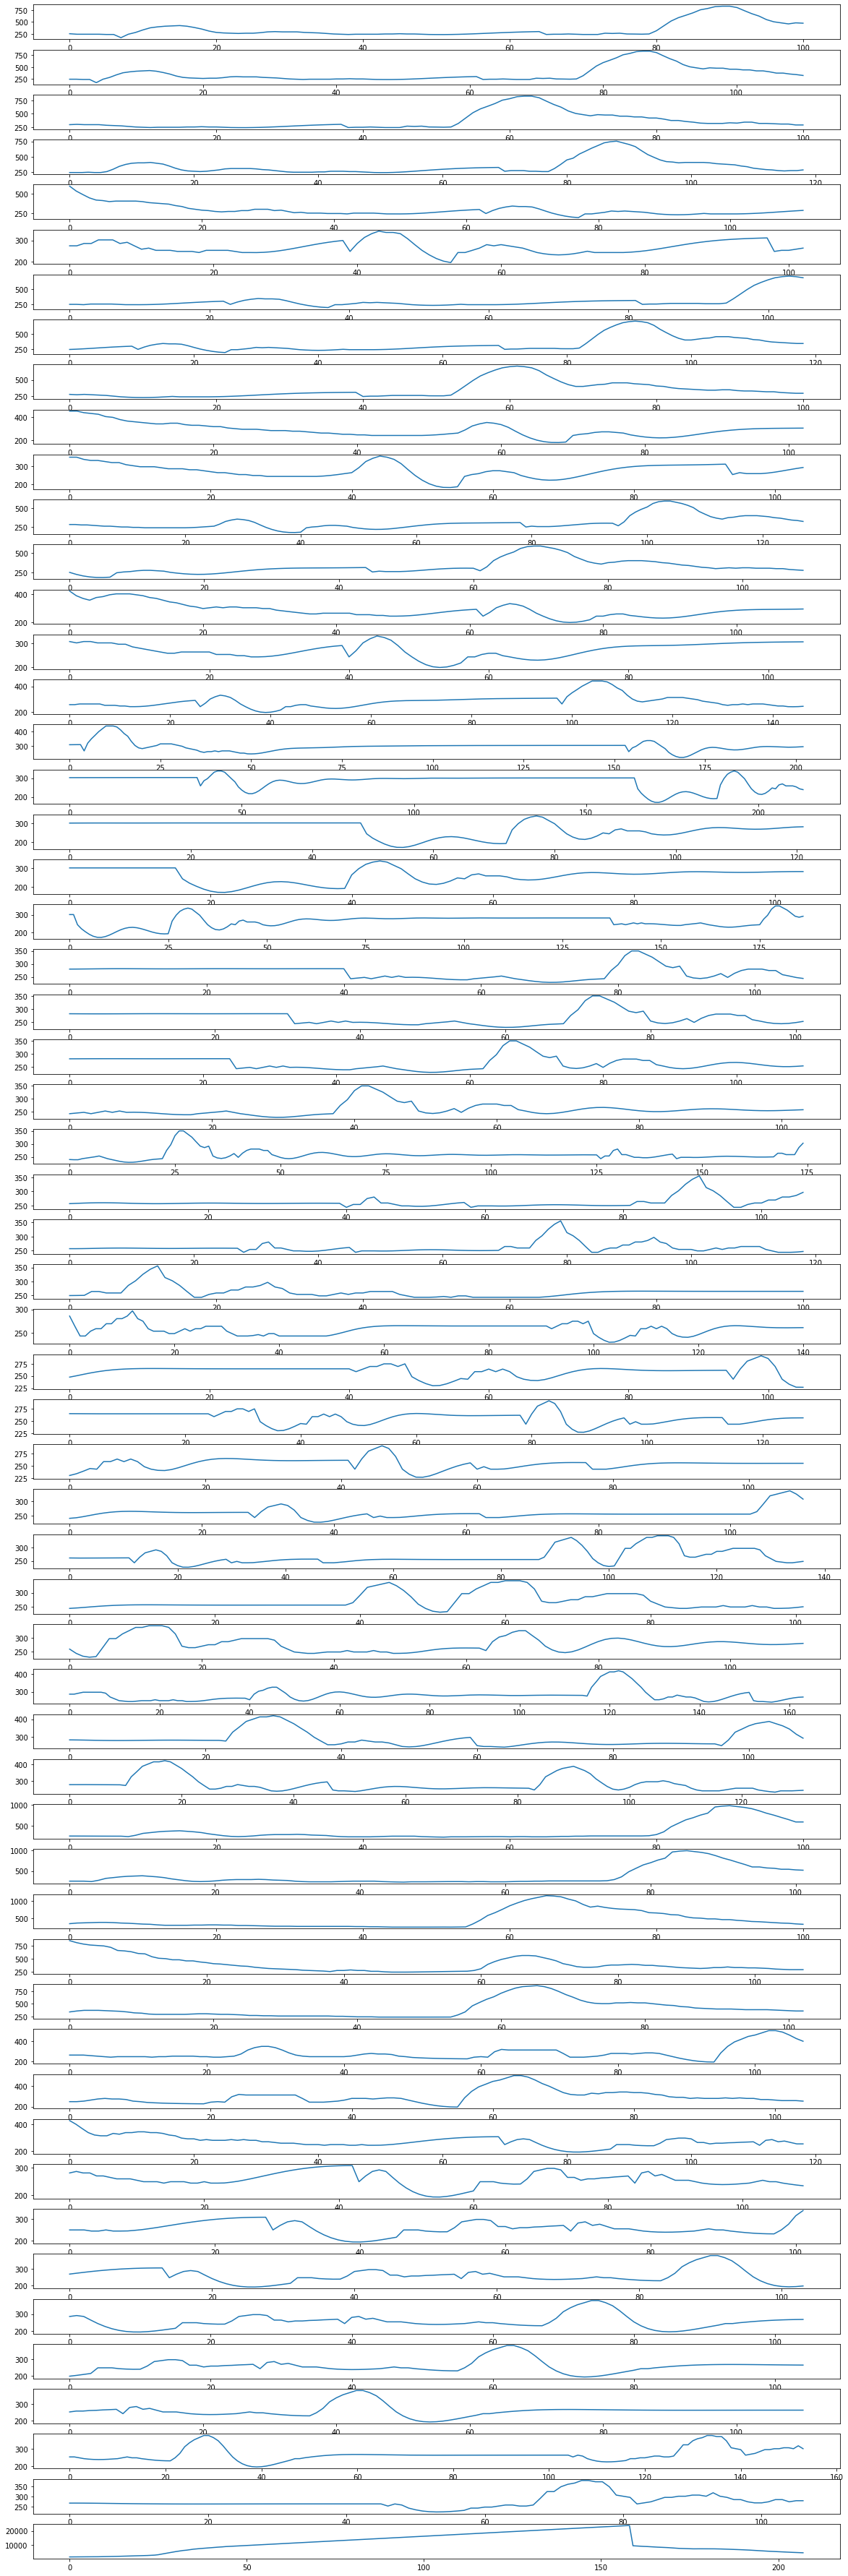

In [ ]:
f, axes = plt.subplots(len(consecutive2), 1)
f.set_size_inches((20, 65))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(len(consecutive2)):
    start = consecutive2[i][0]-50
    end = consecutive2[i][-1]+50
    x = range(len(df_intp['날짜'][start:end]))
    y = df_intp['청담대교_유량'][start:end]
    axes[i].plot(x, y)

plt.show()

In [ ]:
df_intp['청담대교_유량']

0         469.05
1         498.00
2         490.68
3         476.21
4         476.21
           ...  
276331    319.84
276332    314.01
276333    387.55
276334    454.91
276335    582.21
Name: 청담대교_유량, Length: 276336, dtype: float64

In [ ]:
df_intp[['날짜', '청담대교_유량']]

,날짜,청담대교_유량
0,2012-05-01 00:00:00,469.05
1,2012-05-01 00:10:00,498.00
2,2012-05-01 00:20:00,490.68
3,2012-05-01 00:30:00,476.21
4,2012-05-01 00:40:00,476.21
...,...,...
276331,2022-07-18 23:10:00,319.84
276332,2022-07-18 23:20:00,314.01
276333,2022-07-18 23:30:00,387.55
276334,2022-07-18 23:40:00,454.91


In [ ]:
# df_intp[['날짜', '청담대교_유량']].to_csv('/content/drive/MyDrive/신입기수 프로젝트/Dataset/0822_청담대교_유량.csv', encoding = 'cp949')

### 마지막 구간 결측치 처리 (유량 20000 이상)

In [ ]:
nan_last = list(range(273671, 273779))

In [ ]:
n = 10000
train_last = list(range(273671-n, 273779))

In [ ]:
df_last = df_intp.loc[train_last, :]

In [ ]:
df_last

,날짜,잠수교_수위,잠수교_유량,청담대교_수위,청담대교_유량,한강대교_수위,한강대교_유량,행주대교_수위,행주대교_유량
263671,2021-10-23 01:10:00,309.2,NaN,318.7,527.84,313.0,356.60,296.3,820.14
263672,2021-10-23 01:20:00,308.2,NaN,317.7,520.30,313.0,408.79,294.3,790.92
263673,2021-10-23 01:30:00,307.2,NaN,316.7,512.81,311.0,498.74,294.3,790.92
263674,2021-10-23 01:40:00,305.2,NaN,314.7,498.00,310.0,554.36,294.3,790.92
263675,2021-10-23 01:50:00,303.2,NaN,312.7,483.42,308.0,570.11,294.3,790.92
...,...,...,...,...,...,...,...,...,...
273774,2022-07-01 05:00:00,0.0,NaN,0.0,23205.40,0.0,9642.97,0.0,8922.71
273775,2022-07-01 05:10:00,0.0,NaN,0.0,23338.09,0.0,9492.14,0.0,8823.35
273776,2022-07-01 05:20:00,0.0,NaN,0.0,23470.78,0.0,9371.03,0.0,8675.36
273777,2022-07-01 05:30:00,0.0,NaN,0.0,23603.47,0.0,9251.99,0.0,8577.41


In [72]:
# n = 10000

df_sample = df_last.loc[nan_last, '청담대교_유량'].copy()

nlist = [10000, 8000, 6000, 4000, 2000, 1000]
start = 273671
for n in nlist: 
  model = pm.auto_arima(df_last.loc[start-n:start, '청담대교_유량'], seasonal = True)
  df_sample[f'Arima_{n}'] = model.predict(len(nan_last)).values
  print(model.predict(len(lst)))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


10001     9670.939221
10002     9803.573308
10003     9936.199741
10004    10068.828530
10005    10201.456594
             ...     
10105    23464.280080
10106    23596.908314
10107    23729.536549
10108    23862.164783
10109    23994.793018
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


8001     9671.02
8002     9803.71
8003     9936.40
8004    10069.09
8005    10201.78
          ...   
8105    23470.78
8106    23603.47
8107    23736.16
8108    23868.85
8109    24001.54
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


6001     9669.863743
6002     9801.723239
6003     9933.456323
6004    10065.276320
6005    10197.055131
            ...     
6105    23376.196175
6106    23507.987543
6107    23639.778910
6108    23771.570277
6109    23903.361644
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


4001     9669.541066
4002     9801.296294
4003     9932.757663
4004    10064.377722
4005    10195.912085
            ...     
4105    23352.363945
4106    23483.928358
4107    23615.492771
4108    23747.057185
4109    23878.621598
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


2001     9672.838205
2002     9802.780688
2003     9937.428849
2004    10068.668592
2005    10201.628124
            ...     
2105    23453.110088
2106    23585.625295
2107    23718.140502
2108    23850.655709
2109    23983.170916
Length: 109, dtype: float64
1001     9669.513858
1002     9800.826143
1003     9931.976622
1004    10063.230098
1005    10194.449757
            ...     
1105    23317.835606
1106    23449.069410
1107    23580.303213
1108    23711.537016
1109    23842.770819
Length: 109, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
